# Supervised Learning - basics
In this notebook we will learn how to use the most popular supervised learning algorithms. Throughout this exercise, we will use the scikit-learn library (https://scikit-learn.org/stable/), numpy (https://www.numpy.org/), scipy (https://www.scipy.org/), and matplotlib (https://matplotlib.org/), which are all part of anaconda. In this notebook, we will: <br>
 - Simulate simple datasets and learn how to load datasets from scikit-learn.  
 - Use data-related functions by scikit-learn: feature normalization and rescaling, splitting the dataset into training, validation, and test set. 
 - Apply Support Vector Machine (SVM) to a simulated dataset.
 - Apply Decision Trees and Random Forst to a simulated dataset.
 - Apply shallow Neural Network to a simulated dataset.
 - Apply all three algorithms to a dataset from scikit-learn, and compare the resulting accuracy.
 - Produce a ROC curve for all three algorithms, choose the best.



In [25]:
# imports

%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import matplotlib as mpl
import matplotlib.cm as cm
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['half', 'size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# 1. Input dataset
# 1.1. Simulating simple datasets
We will start by simulating a simple dataset for a classification task. <br><br>

It is customary to store the objects with their measured features in a matrix named X. X contains the measured featurs of **all** the objects in our sample (from all classes). <br>
It is customary to store the labels (classes) of the objects in a vector named y. Since the labels are discrete in our case, y will contain numerical integer values, where each integer represents a class label. For example, for a dataset with two classes, y will contain the labels 0 and 1. If the dataset consists of seven objects, five of them belong to one class and two of them belong to the other class, y=[0, 0, 1, 1, 0, 0, 0] means that the first and second objects belong to the first class, the third and the forth objects belong to the second class, and the fifth, sixth, and seventh objects belong to the first class. If our dataset consists of 5 classes, y will contain the integer values 0, 1, 2, 3, 4. One could define the classes with different integers, for example, 8,3,4,1,9. <br><br>

We will simulate a dataset with two classes, each class will contain 500 objects, and each object will have two measured features. We will draw the feature values from a multivariate normal distirbution, which is defined by a mean vector and a covariance matrix. You can change the mean and covariance and examine the results.

shape of the dataset:  (1000, 2) (1000,)
number of objects in the dataset:  1000 1000
number of features per object:  2
number of classes in the dataset:  2
number of objects from class 1:  500
number of objects from class 2:  500


Text(0, 0.5, 'feature 2')

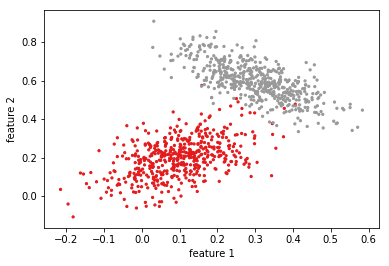

In [3]:
size = 500 # the size of each class

# simulate the first class
mean_1 = np.array([0.1, 0.2])
cov_1 = np.array([[0.01, 0.005], [0.005, 0.01]])
X1 = np.random.multivariate_normal(mean_1, cov_1, size=size) # measured features of class 1 objects
y1 = np.zeros(size) # labels of the class 1 objects

# simulate the second class
mean_2 = np.array([0.3, 0.6])
cov_2 = np.array([[0.01, -0.007], [-0.007, 0.01]])
X2 = np.random.multivariate_normal(mean_2, cov_2, size=size) # measured features of class 2 objects
y2 = np.ones(size) # labels of the class 2 objects

# concatenate X1,X2 and y1,y2 into the final X and y
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

# print various properties of the dataset
print("shape of the dataset: ", X.shape, y.shape)
print("number of objects in the dataset: ", len(y), X.shape[0]) # these two should give similar results
print("number of features per object: ", X.shape[1])
print("number of classes in the dataset: ", len(numpy.unique(y)))
print("number of objects from class 1: ", len(y[y == 0]))
print("number of objects from class 2: ", len(y[y == 1]))

# plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Set1", s=5)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

# 1.2. Loading datasets from scikit-learn
scikit-learn offers several datasets for classification and regression, which can be useful for exercises. In the next cell we will load two different datasets from scikit-learn, and plot their features. <br>
Additional information on the datasets available in scikit-learn: https://scikit-learn.org/stable/datasets/index.html. <br><br>

The first dataset we will load is the iris dataset, which consist of 150 objects, three classes, and each object has four measured features. To visualize the dataset, we will plot scatter plots of pair-wise features in the dataset, where each point represents an object, and its color represents the class of the object.

shape of the dataset:  (150, 4) (150,)
number of objects in the dataset:  150 150
number of features per object:  4
number of classes in the dataset:  3
number of objects from class 1:  50
number of objects from class 2:  50
number of objects from class 3:  50


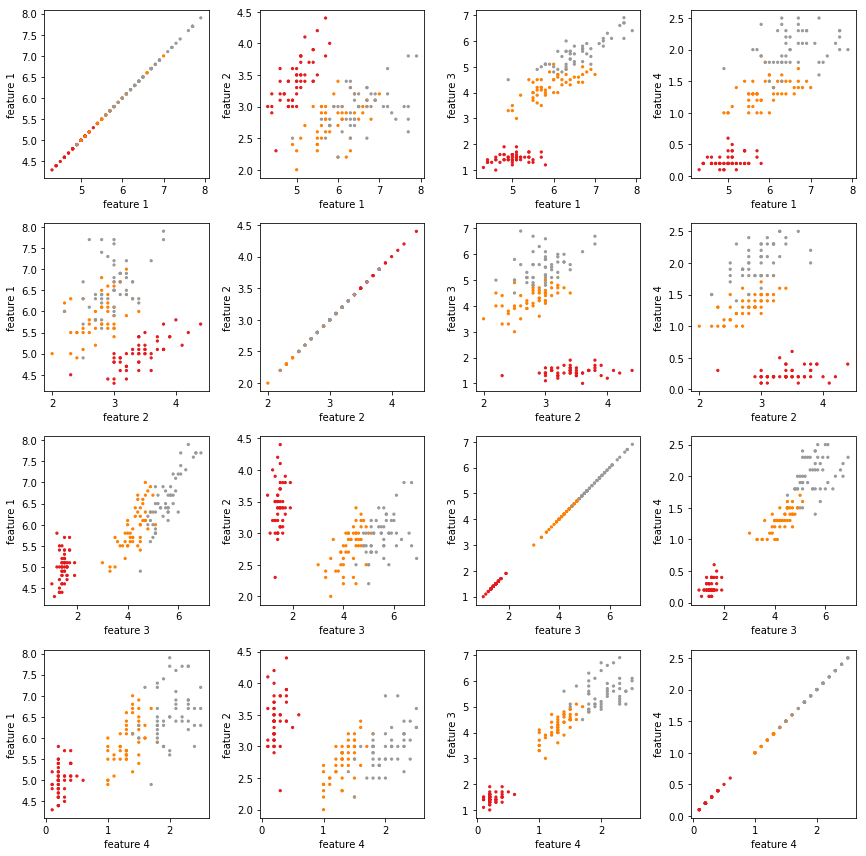

In [4]:
# load the dataset 
X, y = sklearn.datasets.load_iris(return_X_y=True)

# print various properties of the dataset
print("shape of the dataset: ", X.shape, y.shape)
print("number of objects in the dataset: ", len(y), X.shape[0]) # these two should give similar results
print("number of features per object: ", X.shape[1])
print("number of classes in the dataset: ", len(numpy.unique(y)))
print("number of objects from class 1: ", len(y[y == 0]))
print("number of objects from class 2: ", len(y[y == 1]))
print("number of objects from class 3: ", len(y[y == 1]))

# visualize the dataset with pair-wise scatter plots
plt.figure(1, figsize=(12, 12))
feature_vector = ['feature 1', 'feature 2', 'feature 3', 'feature 4']
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, 4*i + j +1)
        plt.scatter(X[:, i], X[:, j], c=y, cmap="Set1", s=5)
        plt.xlabel(feature_vector[i])
        plt.ylabel(feature_vector[j])
        
plt.tight_layout()

The second dataset we will load is the boston dataset, which is used for regression. The dataset consists of 506 objects, each object has 13 measured features. Since in regression the target variable is continous, we will produce a plot that shows the dependence of y on all the 13 features.

shape of the dataset:  (506, 13) (506,)
number of objects in the dataset:  506 506
number of features per object:  13


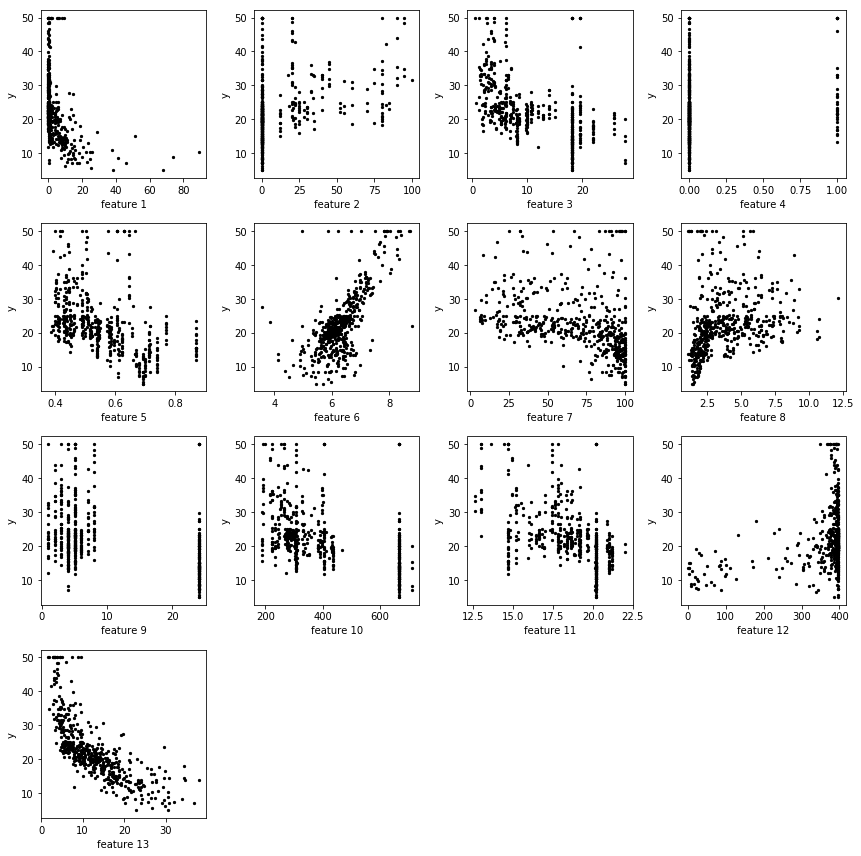

In [5]:
# load the boston dataset
X, y = sklearn.datasets.load_boston(return_X_y=True)

# print various properties of the dataset
print("shape of the dataset: ", X.shape, y.shape)
print("number of objects in the dataset: ", len(y), X.shape[0]) # these two should give similar results
print("number of features per object: ", X.shape[1])

# visualize the dataset by plotting the target variable, y, versus the 13 features
plt.figure(1, figsize=(12, 12))
for i in range(X.shape[1]):
    plt.subplot(4, 4, i+1)
    plt.scatter(X[:, i], y, s=5, color="k")
    plt.xlabel("feature %s" % (i+1))
    plt.ylabel("y")
    
plt.tight_layout()

# 1.3. Spliting the dataset into training, validation, and test sets
Now we will split the dataset into training, validation, and test sets.  We will start by splitting the dataset manualy, by using numpy indexing. <br>
Then, we will use scikit-learn procedures to split the dataset using: <br> 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html <br><br>

First example: split the dataset into training and test sets manualy (without validation set), such that the training and test sets are of equal size. For that, we will load again the iris dataset, which consists of 506 objects. Therefore, we expect that the training set will contain 253 objects, each with 13 features, and the test set will contain 253 objects, each with 13 features as well.

In [6]:
# load the iris dataset again
X, y = sklearn.datasets.load_boston(return_X_y=True)
number_of_objects = len(y)
half = int(number_of_objects/2)

# split the dataset into training and test sets
X_train = X[0:half, :]
y_train = y[0:half]
X_test = X[half: number_of_objects, :]
y_test = y[half: number_of_objects]

# print the size of the resulting vectors and matrices
print("shape of X_train: ", X_train.shape)
print("shape of y_train: ", y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_test: ", y_test.shape)

shape of X_train:  (253, 13)
shape of y_train:  (253,)
shape of X_test:  (253, 13)
shape of y_test:  (253,)


Second example: split the dataset into training and test sets using scikit-learn. To understand what the function train_test_split does, go to the following link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html. <br>
We can see that the function shuffles the input dataset before splitting it into training and test sets, though we can change it if we want. In addition, we see that we can provide the function with the fraction of the objects we want in the training and test sets. We will start by dividing the data into equaly-sized sets, just like in the previous example.

In [7]:
# split the data using scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5)

# print the size of the resulting vectors and matrices
print("shape of X_train: ", X_train.shape)
print("shape of y_train: ", y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_test: ", y_test.shape)

# we get similar results when we define only trian_size (without test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

# print the size of the resulting vectors and matrices
print("shape of X_train: ", X_train.shape)
print("shape of y_train: ", y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_test: ", y_test.shape)

shape of X_train:  (253, 13)
shape of y_train:  (253,)
shape of X_test:  (253, 13)
shape of y_test:  (253,)
shape of X_train:  (253, 13)
shape of y_train:  (253,)
shape of X_test:  (253, 13)
shape of y_test:  (253,)


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


**Exercise**: Load the boston dataset, and split it into training and test sets using the train_test_split function. Split the dataset so that the training set constitutes 75% percent of the input dataset, and the test set constitutes 25%. Print the sizes of the resulting training and test set, and compare it to the size of the initial dataset.

**Exercise:** Now split the boston dataset into training, **validation**, and test sets using the train_test_split function. Split the dataset to ratios of 0.8:0.1:0.1 for the training, validation, and test sets respectively. <br>
Note: the train_test_split function does not have an option to split the dataset into three sets (only into two sets). 

# 2. Support Vector Machine
# 2.1. Simple application to the simulated dataset
In this part of the notebook we will apply SVM to the simple two-dimensional dataset we simulated in part #1 of the notebook. <br>
We will train an SVM classifier, and examine its accuracy on the training, validation and test set. Remember: since the SVM **was trained** on the training sets, we expect that the accuracy on the training set will be higher than the accuracy on the validation and the test set. <br>

We will use the scikit-learn implementation of SVM classification: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br>

In this first example, we will simulate again the simple two-dimensional data, and divide it into training, validation, and test sets with split ratios of 0.4:0.3:0.3 respectively. We will start with the 'linear' kernal.

In [8]:
# simulate the simple dataset
size = 500 # the size of each class

# simulate the first class
mean_1 = np.array([0.1, 0.2])
cov_1 = np.array([[0.01, 0.005], [0.005, 0.01]])
X1 = np.random.multivariate_normal(mean_1, cov_1, size=size) # measured features of class 1 objects
y1 = np.zeros(size) # labels of the class 1 objects

# simulate the second class
mean_2 = np.array([0.3, 0.6])
cov_2 = np.array([[0.01, -0.007], [-0.007, 0.01]])
X2 = np.random.multivariate_normal(mean_2, cov_2, size=size) # measured features of class 2 objects
y2 = np.ones(size) # labels of the class 2 objects

# concatenate X1,X2 and y1,y2 into the final X and y
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

print("shape of X: ", X.shape)
print("shape of y: ", y.shape)

shape of X:  (1000, 2)
shape of y:  (1000,)


In [9]:
# split the dataset into training, validation, and test sets
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, train_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, train_size=0.5)

print("shape of training set: ", X_train.shape, y_train.shape)
print("shape of validation set: ", X_val.shape, y_val.shape)
print("shape of test set: ", X_test.shape, y_test.shape)

shape of training set:  (400, 2) (400,)
shape of validation set:  (300, 2) (300,)
shape of test set:  (300, 2) (300,)


In [10]:
# define an SVM classifier
svm = SVC(kernel='linear')

# train the classifier on the training set
svm.fit(X_train, y_train)

# print the accuracy on the training set, and on the validation set
accuracy_on_training_set = svm.score(X_train, y_train)
accuracy_on_validation_set = svm.score(X_val, y_val)
accuracy_on_test_set = svm.score(X_test, y_test)
print("accuracy on the training set: ", accuracy_on_training_set)
print("accuracy on the validation set: ", accuracy_on_validation_set)
print("accuracy on the test set: ", accuracy_on_test_set)

accuracy on the training set:  0.985
accuracy on the validation set:  0.9933333333333333
accuracy on the test set:  0.9933333333333333


We will now use the trained SVM classifier to predict the class of objects, given their measured features. <br>
**Note**: The trained classfier assumes that the input is of the same type as the data the classifier was trained on. <br>
**Note**: Since the prediction stage requires only the measures features (and not the labels), the predict function will be provided with the feature matrix, and not with the labels. <br>
In this particular example, we will predict the classes of the objects in the training and the validation sets, and then we will plot the classes predicted by the classifier. We will mark cases in which the classifier made a mistake with larger markers.

In [11]:
# predict the class of the objects in the validation and test sets. 
y_val_predict = svm.predict(X_val)
y_test_predict = svm.predict(X_test)

# print the predicted class versus the actual class of the objects in the validation set
for i in range(len(y_val)):
    print("predicted: %s, actual class: %s" % (y_val_predict[i], y_val[i]))

predicted: 1.0, actual class: 1.0
predicted: 1.0, actual class: 1.0
predicted: 1.0, actual class: 1.0
predicted: 0.0, actual class: 0.0
predicted: 1.0, actual class: 1.0
predicted: 1.0, actual class: 0.0
predicted: 1.0, actual class: 1.0
predicted: 0.0, actual class: 0.0
predicted: 1.0, actual class: 1.0
predicted: 1.0, actual class: 1.0
predicted: 1.0, actual class: 1.0
predicted: 0.0, actual class: 0.0
predicted: 0.0, actual class: 0.0
predicted: 0.0, actual class: 0.0
predicted: 1.0, actual class: 1.0
predicted: 0.0, actual class: 0.0
predicted: 1.0, actual class: 1.0
predicted: 0.0, actual class: 0.0
predicted: 1.0, actual class: 1.0
predicted: 0.0, actual class: 0.0
predicted: 1.0, actual class: 0.0
predicted: 0.0, actual class: 0.0
predicted: 0.0, actual class: 0.0
predicted: 0.0, actual class: 0.0
predicted: 1.0, actual class: 1.0
predicted: 1.0, actual class: 1.0
predicted: 1.0, actual class: 1.0
predicted: 1.0, actual class: 1.0
predicted: 0.0, actual class: 0.0
predicted: 0.0

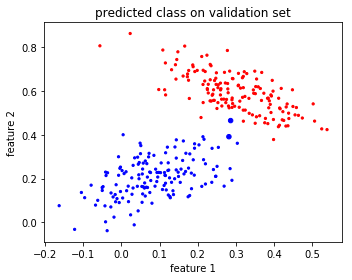

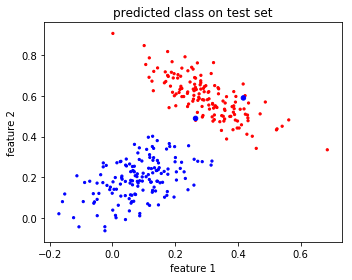

In [12]:
# plot the predicted classes in the validation and the test sets
# in cases where the SVM failed to predict the class correctly, use larger markers

plt.figure(1, figsize=(5,4))
plt.title("predicted class on validation set")
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val_predict, s=5, cmap="bwr")
plt.scatter(X_val[:, 0][y_val_predict != y_val], 
            X_val[:, 1][y_val_predict != y_val], 
            c=y_val_predict[y_val_predict != y_val], s=20, cmap="bwr")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.tight_layout()

plt.figure(2, figsize=(5,4))
plt.title("predicted class on test set")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_predict, s=5, cmap="bwr")
plt.scatter(X_test[:, 0][y_test_predict != y_test], 
            X_test[:, 1][y_test_predict != y_test], 
            c=y_test_predict[y_test_predict != y_test], s=20, cmap="bwr")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.tight_layout()

# 2.2. Visualizing the decision boundary of linear SVM
In this example we will train an SVM on the same dataset as in #2.1, and we will visualize the decision boundary of the trained classifier. The decision boundary is the region in the paremeter space that separates the two classes of objects. <br>
To do that, SVM will assign a probability of an object to be assigned to each of the classes, and by visualizing this probability in every point in the parameter space, we will see the decision boundary. <br>

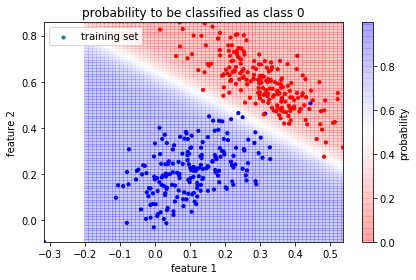

In [13]:
# define the classifier and train on the training data. Note that now we use probability=True
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# create a grid that covers the entire parameter space, this grid will be used to assign probabilities with the 
# trained SVM.
xx = numpy.linspace(-0.2, 0.9, 100)
yy = numpy.linspace(-0.3, 0.9, 100).T
xx, yy = numpy.meshgrid(xx, yy)
Xfull = numpy.c_[xx.ravel(), yy.ravel()]

# now use the svm to predict the probability to be in a given class
probas = svm.predict_proba(Xfull)
proba_class_0 = probas[:, 0] # the probability to belong to class 0 
proba_class_1 = probas[:, 1] # the probability to belong to class 1

# now plot this probability in the feature space
plt.figure(1)
plt.title("probability to be classified as class 0")
plt.pcolor(xx, yy, np.reshape(proba_class_0, (100, 100)), alpha=0.2, cmap="bwr_r")
plt.colorbar(label="probability")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="bwr", s=10, label="training set")
plt.xlim(X_train[:, 0].min(), X_train[:, 0].max())
plt.ylim(X_train[:, 1].min(), X_train[:, 1].max())
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend(loc="best")
plt.tight_layout()

### The probability plot
One can see that the probability plot marks the decision boundary between the two classes (colored with white). <br>
Every object that lies above the white region will be classified as a "red" object. <br>
Every object that lies beneath the white region will be classified as "blue" object. 

# 2.3. Applying SVM with a more complex kernel
In this example we will use a similar two-dimensional dataset, but now we will train an SVM with a different kernel, and examine the effect of the SVM hyper-parameters. Specifically, we will use the RBF kernel, which has a free parameter named gamma. <br>

The SVM with the RBF kernel has a hyper-parameter named gamma. We will use the validation set to find the best gamma for our particular dataset. <br>
Then, we will see what is the effect of overfitting, and how we can find a gamma parameter that minimizes overfitting.

For additional details, see: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [14]:
# simulate a dataset with smaller separation between the groups
size = 500
mean_1 = np.array([0.1, 0.2])
cov_1 = np.array([[0.01, 0.005], [0.005, 0.01]])
X1 = np.random.multivariate_normal(mean_1, cov_1, size=size)
y1 = np.zeros(size)

mean_2 = np.array([0.3, 0.45])
cov_2 = np.array([[0.01, -0.007], [-0.007, 0.01]])
X2 = np.random.multivariate_normal(mean_2, cov_2, size=size)
y2 = np.ones(size)

X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))
print("shape of the dataset: ", X.shape, y.shape)

shape of the dataset:  (1000, 2) (1000,)


In [15]:
# split the dataset into training, validation, and test sets
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, train_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, train_size=0.5)

print("shape of training set: ", X_train.shape, y_train.shape)
print("shape of validation set: ", X_val.shape, y_val.shape)
print("shape of test set: ", X_test.shape, y_test.shape)

shape of training set:  (400, 2) (400,)
shape of validation set:  (300, 2) (300,)
shape of test set:  (300, 2) (300,)


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [16]:
# define an SVM classifier with an RBF kernel
svm = SVC(kernel='rbf', gamma=1)

# train the classifier on the training set
svm.fit(X_train, y_train)

# print the accuracy on the training set, and on the validation set
accuracy_on_training_set = svm.score(X_train, y_train)
accuracy_on_validation_set = svm.score(X_val, y_val)
accuracy_on_test_set = svm.score(X_test, y_test)
print("accuracy on the training set: ", accuracy_on_training_set)
print("accuracy on the validation set: ", accuracy_on_validation_set)
print("accuracy on the test set: ", accuracy_on_test_set)

accuracy on the training set:  0.9425
accuracy on the validation set:  0.9533333333333334
accuracy on the test set:  0.9666666666666667


**Exercise**: Plot the decision boundary (using the predicted probabilities) of the trained SVM.

### Optimizing for the gamma parameter
We will now train an SVM using different gamma values. As before, the training will be on the training set. <br>
To find the best gamma parameter, we will train the SVM using different gamma values and examine its accuracy on the validation set. We will select the gamma parameter that results in the best accuracy on the validation set. 

In [17]:
gamma_list_to_consider = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 200, 500, 1000, 10000, 50000]

accuracies_training = []
accuracies_validation = []

for i, gamma_value in enumerate(gamma_list_to_consider):
    # define an SVM classifier with the RBF kernel and the given gamma
    svm = SVC(kernel='rbf', gamma=gamma_value)
    # train the classifier on the training set
    svm.fit(X_train, y_train)
    # extract the accuracy on the validation set
    accuracy_on_training_set = svm.score(X_train, y_train)
    accuracy_on_validation_set = svm.score(X_val, y_val)
    # print the gamma value under consideration and the accuracy
    print("gamma=%s, accuracy=%s" % (gamma_value, accuracy_on_validation_set))
    
    # save accuracies to a list, which we will use later
    accuracies_training.append(accuracy_on_training_set)
    accuracies_validation.append(accuracy_on_validation_set)

gamma=0.0001, accuracy=0.5066666666666667
gamma=0.001, accuracy=0.5066666666666667
gamma=0.01, accuracy=0.5066666666666667
gamma=0.1, accuracy=0.9366666666666666
gamma=1, accuracy=0.9533333333333334
gamma=5, accuracy=0.96
gamma=10, accuracy=0.9633333333333334
gamma=200, accuracy=0.9633333333333334
gamma=500, accuracy=0.9633333333333334
gamma=1000, accuracy=0.95
gamma=10000, accuracy=0.8333333333333334
gamma=50000, accuracy=0.6766666666666666


We can see that the gamma parameter that gives the highest accuracy is either 1 or 5. Therefore, for our final classifier, we will use an SVM with an RBF kernel and gamma=1. 

### The effect of overfitting
To examine whether changing the gamma parameter may result in overfitting, we will use the accuracies of SVM on the training set and on the validation set, and plot them as a function of gamma. 

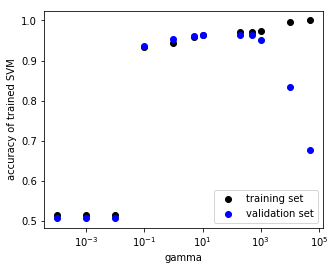

In [18]:
plt.figure(1, figsize=(5, 4))
plt.plot(gamma_list_to_consider, accuracies_training, "ok", label="training set")
plt.plot(gamma_list_to_consider, accuracies_validation, "ob", label="validation set")
plt.xscale("log")

plt.xlabel("gamma")
plt.ylabel("accuracy of trained SVM")
plt.legend(loc="best")

### What do we see?
We see the effect of overfitting. As we increase the size of the gamma parameter, we allow the model to become more complex. As a result, the model is overfitting the training data. Specifically, we can see that the algorithm "learns the training examples by heart!". <br>
We also see that the accuracy on the training set becomes larger and larger, while the accuracy on the validation set decreases! <br><br>

**To avoid overfitting**: select a gamma parameter that results in a (roughly) similar accuracy for the training versus the validation sets. In our particular example, the best gamma is 1. 

**Exercise**: plot the decision boundary for every gamma value, can you see how the SVM "learns the examples by heart" for high gamma values?

# 2.4. Applying SVM to a dataset with features that have different units
We will now examine a case in which we have to normalize the features in order to get a good accuracy. <br>
To understand why feature normalization (or rescaling) is important, we will simulate a dataset with two features, where the features are distributed over different dynamical scales. In particular, one of the features will be distributed over small scales, while the other on large scales. 

shape of the dataset:  (2000, 2) (2000,)


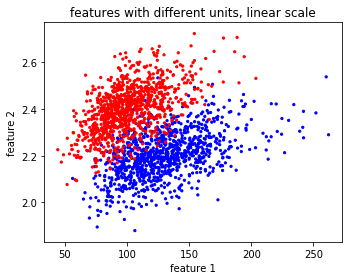

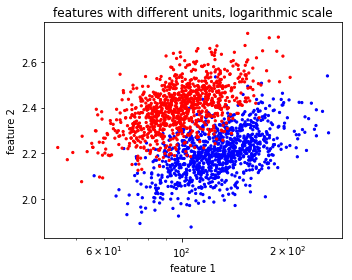

In [19]:
# simulate the two-dimensional dataset
size = 1000
mean_1 = np.array([2.1, 2.2])
cov_1 = np.array([[0.01, 0.005], [0.005, 0.01]])
X1 = np.random.multivariate_normal(mean_1, cov_1, size=size)
y1 = np.zeros(size)

mean_2 = np.array([2.0, 2.4])
cov_2 = np.array([[0.01, 0.005], [0.005, 0.01]])
X2 = np.random.multivariate_normal(mean_2, cov_2, size=size)
y2 = np.ones(size)

# change the units of one of the features 
X1_copy = X1.copy()
X1_copy[:, 0] = 10**X1[:, 0]
X2_copy = X2.copy()
X2_copy[:, 0] = 10**X2[:, 0]

X = np.concatenate((X1_copy, X2_copy))
y = np.concatenate((y1, y2))
print("shape of the dataset: ", X.shape, y.shape)

# plot the dataset in linear scale
plt.figure(1, figsize=(5, 4))
plt.title("features with different units, linear scale")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", s=5)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.tight_layout()

# plot the dataset with logarthmic scale for feature 2
plt.figure(2, figsize=(5, 4))
plt.title("features with different units, logarithmic scale")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", s=5)
plt.xscale("log")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.tight_layout()

accuracy on the training set:  0.9283333333333333
accuracy on the test set:  0.93375


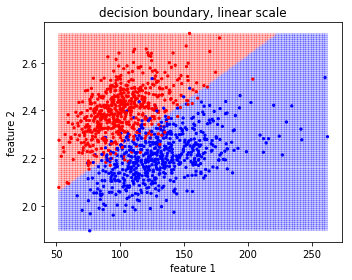

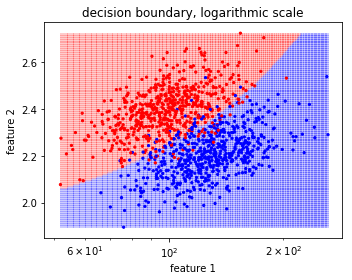

In [20]:
# split the dataset into training and test sets (no validation set in this example)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4)

# train a linear SVM 
svm = SVC(kernel="linear", probability=True)
svm.fit(X_train, y_train)

# print the accuracy on the training and the test set
print("accuracy on the training set: ", svm.score(X_train, y_train))
print("accuracy on the test set: ", svm.score(X_test, y_test))

# plot the decision boundaries of the algorithm, using linear scale
plt.figure(1, figsize=(5, 4))
plt.title("decision boundary, linear scale")
xx = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
yy = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]
prediction_full = svm.predict(Xfull)
plt.pcolormesh(xx, yy, prediction_full.reshape((100, 100)), cmap="bwr", alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="bwr", s=5)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.tight_layout()

plt.figure(2, figsize=(5, 4))
plt.title("decision boundary, logarithmic scale")
xx = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
yy = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]
prediction_full = svm.predict(Xfull)
plt.pcolormesh(xx, yy, prediction_full.reshape((100, 100)), cmap="bwr", alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="bwr", s=5)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.xscale("log")
plt.tight_layout()

**Exercise:** define a new dataset in which the first feature is log10(first feature) from the previous dataset, and the second feature is similar to the second feature from the previous dataset. Examine the accuracy on the training and test test. Do you see an improvement?

# 2.5. Applying SVM to an imbalanced dataset
We will now examine the effect of class imbalance on the accuracy of SVM. <br>
Reminder: in a two-dimensional classification task, class imblance occurs when one of the classes is much smaller than the other class. 

We will simulate the same simple dataset as before, but now one of the classes will be much smaller than the other. We will then train an SVM classifier and examine the accuracy on the test set. In this particular example, we will split the dataset into training and test sets (no validation set). 

shape of the dataset:  (510, 2) (510,)
number of objects in the dataset:  510 510
number of features per object:  2
number of classes in the dataset:  2
number of objects from class 1:  500
number of objects from class 2:  10


Text(0, 0.5, 'feature 2')

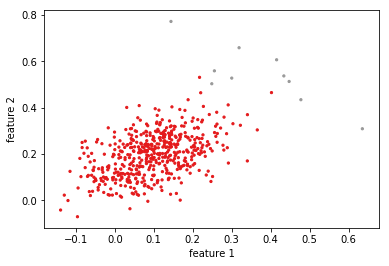

In [22]:
# simulate the first class
size_1 = 500 # the size of class 1
mean_1 = np.array([0.1, 0.2])
cov_1 = np.array([[0.01, 0.005], [0.005, 0.01]])
X1 = np.random.multivariate_normal(mean_1, cov_1, size=size_1) # measured features of class 1 objects
y1 = np.zeros(size_1) # labels of the class 1 objects

# simulate the second class
size_2 = 10 # the size of class 1
mean_2 = np.array([0.3, 0.6])
cov_2 = np.array([[0.01, -0.007], [-0.007, 0.01]])
X2 = np.random.multivariate_normal(mean_2, cov_2, size=size_2) # measured features of class 2 objects
y2 = np.ones(size_2) # labels of the class 2 objects

# concatenate X1,X2 and y1,y2 into the final X and y
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

# print various properties of the dataset
print("shape of the dataset: ", X.shape, y.shape)
print("number of objects in the dataset: ", len(y), X.shape[0]) # these two should give similar results
print("number of features per object: ", X.shape[1])
print("number of classes in the dataset: ", len(numpy.unique(y)))
print("number of objects from class 1: ", len(y[y == 0]))
print("number of objects from class 2: ", len(y[y == 1]))

# plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Set1", s=5)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

In [23]:
# split the dataset into training and test sets (no validation set in this example)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4)

**Exercise:** train an SVM with a linear kernel to distinguish between the two classes of objects. Examine how the accuracy on the training and test set changes as a function of the size-ratio of the two groups. That is, increase the size of the smaller class gradually, and examine the accuracy. Given these results, do you believe that SVM is sensitive to class imblanace?

**Exercise:** use again the simulated dataset with class imbalance. Before training an SVM with a linear kernel, define the SVM classifier to have class weights. That is, define SVM like this: SVC(kernel="linear", class_weight='balanced'). Compare the accuracy of a regular trained SVM to the accuracy of an SVM with class weights. 
To read about class weights, see: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# 3. Decision Trees and Random Forests
In this part of the notebook we will train a single decision tree and compare its performance to the performance of a collection of decision trees, in the form of Random Forest: <br>
 - We will examine the feature importance score provided by the Decision Tree or the Random Forest.
 - We will examine the parameters of the Random Forest: the number of trees in the forest, the number of random features we use in each split, and the splitting criterion. 
 - We will examine the effect of unnormalized features and class imbalance.
 - We will compare the performance of SVM to the performance of Random Forest.
<br>

We will use the scikit-learn implementation of Decision Trees and Random Forests: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
<br><br>

We will start by using the iris dataset from sklearn. Then, we will simulate a more complex dataset using sklearn.

In [24]:
# load the dataset 
X, y = sklearn.datasets.load_iris(return_X_y=True)

# print various properties of the dataset
print("shape of the dataset: ", X.shape, y.shape)
print("number of objects in the dataset: ", len(y), X.shape[0]) # these two should give similar results
print("number of features per object: ", X.shape[1])
print("number of classes in the dataset: ", len(numpy.unique(y)))
print("number of objects from class 1: ", len(y[y == 0]))
print("number of objects from class 2: ", len(y[y == 1]))
print("number of objects from class 3: ", len(y[y == 1]))

# split the dataset into training and test sets (no validation set in this example)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4)

shape of the dataset:  (150, 4) (150,)
number of objects in the dataset:  150 150
number of features per object:  4
number of classes in the dataset:  3
number of objects from class 1:  50
number of objects from class 2:  50
number of objects from class 3:  50


In [26]:
# define a Decision Tree classifier and train it on the training set
decision_tree = DecisionTreeClassifier(criterion='gini')
decision_tree.fit(X_train, y_train)


# apply and Decision Tree to the training and test sets, and print the accuracy
print("Decision tree accuracy on the training set: ", decision_tree.score(X_train, y_train))
print("Decision tree accuracy on the test set: ", decision_tree.score(X_test, y_test))

Decision tree accuracy on the training set:  1.0
Decision tree accuracy on the test set:  0.95


In [29]:
# define a Random Forest classifier and train it on the training set
n_estimators = 100 # number of trees in the forest
max_features= 4 # number of random features to consider in each split 
random_forest = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, criterion='gini')
random_forest.fit(X_train, y_train)


# apply and Random Forest to the training and test sets, and print the accuracy
print("Random Forest accuracy on the training set: ", random_forest.score(X_train, y_train))
print("Random Forest accuracy on the test set: ", random_forest.score(X_test, y_test))

Random Forest accuracy on the training set:  1.0
Random Forest accuracy on the test set:  0.95


# 3.1. Simulating complex datasets
We will now use scikit-learn to simulate complex datasets with many features. <br>
We can decide what is the number of features, and how many of them are informative. We can also decide how many features will be redundant (correlated features). <br>
You can read about it more here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html 

In [36]:
# simulate a dataset with 30 features, out of them 5 will be uninformative, and 5 will be redundant.
X_total, y_total = make_classification(n_samples=5000, n_features=30, n_informative=25, n_redundant=5)
print("shape of our simulated dataset: ", X_total.shape, y_total.shape)

# divide the sample into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, train_size=0.6, test_size=0.4)
print("shape of our training set: ", X_train.shape, y_train.shape)
print("shape of our test set: ", X_test.shape, y_test.shape)

shape of our simulated dataset:  (5000, 30) (5000,)
shape of our training set:  (3000, 30) (3000,)
shape of our test set:  (2000, 30) (2000,)


In [31]:
# define a Decision Tree classifier and train it on the training set
decision_tree = DecisionTreeClassifier(criterion='gini')
decision_tree.fit(X_train, y_train)

# apply and Decision Tree to the training and test sets, and print the accuracy
print("Decision tree accuracy on the training set: ", decision_tree.score(X_train, y_train))
print("Decision tree accuracy on the test set: ", decision_tree.score(X_test, y_test))

Decision tree accuracy on the training set:  1.0
Decision tree accuracy on the test set:  0.79


In [32]:
# define a Random Forest classifier and train it on the training set
n_estimators = 100 # number of trees in the forest
max_features= 4 # number of random features to consider in each split 
random_forest = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, criterion='gini')
random_forest.fit(X_train, y_train)


# apply and Random Forest to the training and test sets, and print the accuracy
print("Random Forest accuracy on the training set: ", random_forest.score(X_train, y_train))
print("Random Forest accuracy on the test set: ", random_forest.score(X_test, y_test))

Random Forest accuracy on the training set:  1.0
Random Forest accuracy on the test set:  0.936


**Note:**: for the more complex dataset, we see that the Random Forest performs better than a single decision tree. <br>
However, we defined the Random Forest to have particular parameters (100 trees in the forest, four random features per split in each tree, and 'gini' as the splitting criterion). To find the best parameters, we need to optimize them using the accuracy on the validation set. <br><br>

**Exercise:** divide the complex dataset into training, validation, and test sets. Examine different parameters, number of trees in the forest (n_estimators), number of features to consider per split (max_features), and the splitting criterion (criterion). Find the parameter values that give the maximal accuracy on the validation set. Which parameters are they?

# 3.2. Feature importance
Decision Trees and Random Forests provide a feature importance measure. This measure gives the relative importance of the different features in the dataset (we could have a dataset in which only 2 out of 20 features are important and relevant for the classification task at hand). <br>
We will use the same complex dataset (with 30 features), we will train Decision Tree and Random Forest classifier, and plot the feature importance. 

Decision tree accuracy on the training set:  1.0
Decision tree accuracy on the test set:  0.7895


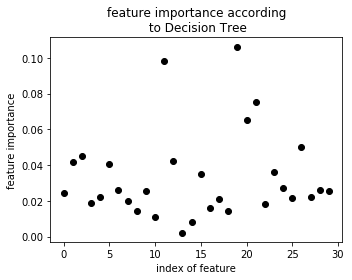

In [33]:
# define a Decision Tree classifier and train it on the training set
decision_tree = DecisionTreeClassifier(criterion='gini')
decision_tree.fit(X_train, y_train)

# apply and Decision Tree to the training and test sets, and print the accuracy
print("Decision tree accuracy on the training set: ", decision_tree.score(X_train, y_train))
print("Decision tree accuracy on the test set: ", decision_tree.score(X_test, y_test))

# extract the feature importance and plot it
decision_tree_feature_importance = decision_tree.feature_importances_
plt.figure(1, figsize=(5, 4))
plt.title("feature importance according\n to Decision Tree")
plt.plot(decision_tree_feature_importance, "ok")
plt.xlabel("index of feature")
plt.ylabel("feature importance")
plt.tight_layout()

Random Forest accuracy on the training set:  1.0
Random Forest accuracy on the test set:  0.925


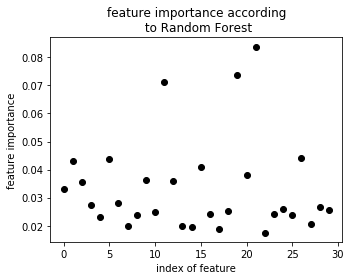

In [34]:
# define a Random Forest classifier and train it on the training set
n_estimators = 100 # number of trees in the forest
max_features= 4 # number of random features to consider in each split 
random_forest = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, criterion='gini')
random_forest.fit(X_train, y_train)

# apply and Random Forest to the training and test sets, and print the accuracy
print("Random Forest accuracy on the training set: ", random_forest.score(X_train, y_train))
print("Random Forest accuracy on the test set: ", random_forest.score(X_test, y_test))

# extract the feature importance and plot it
random_forest_feature_importance = random_forest.feature_importances_
plt.figure(1, figsize=(5, 4))
plt.title("feature importance according\n to Random Forest")
plt.plot(random_forest_feature_importance, "ok")
plt.xlabel("index of feature")
plt.ylabel("feature importance")
plt.tight_layout()

We will now plot the feature importance by the Decision Tree versus the feature importance by Random Forest. Do these two estimates agree?

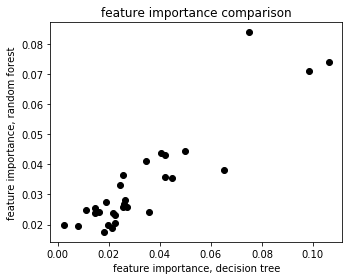

In [35]:
plt.figure(1, figsize=(5, 4))
plt.title("feature importance comparison")
plt.plot(decision_tree_feature_importance, random_forest_feature_importance, "ok")
plt.ylabel("feature importance, random forest")
plt.xlabel("feature importance, decision tree")
plt.tight_layout()

**Exercise:** use the feature importance measure by the Random Forest. Remove the three worst features in the dataset, and then split it into training and test sets. Train a Random Forest using this smaller dataset, and examine the resulting accuracy, compared to the accuracy using all the features (before removing the three worst features). By how much did the accuracy change?<br>
Then, remove the three **best** features and compare the accuracy. By how much did the accuracy change?

# 3.3. Feature normalization and imbalanced datasets
In this part of the notebook we will examine the effect of feature normalization and class imbalance on the accuracy of the Random Forest. We will start by simulating an imbalances dataset, and will compare the accuracy of a "regular" Random Forest to the accuracy of a Random Forest where class weight is applied.

In [37]:
# simulate a dataset with 30 features, out of them 5 will be uninformative, and 5 will be redundant.
# NOTE: we will create an imblanced dataset using weights=[0.9, 0.1], this means that the first class 
# is 90% of the objects, and the second class is 10% of the o bjects
X_total, y_total = make_classification(n_samples=5000, n_features=30, n_informative=25, n_redundant=5, weights=[0.9, 0.1])
print("shape of our simulated dataset: ", X_total.shape, y_total.shape)
print("number of objects from class 1: ", len(y_total[y_total == 0]))
print("number of objects from class 2: ", len(y_total[y_total == 1]))

# divide the sample into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, train_size=0.6, test_size=0.4)
print("shape of our training set: ", X_train.shape, y_train.shape)
print("shape of our test set: ", X_test.shape, y_test.shape)

shape of our simulated dataset:  (5000, 30) (5000,)
number of objects from class 1:  4477
number of objects from class 2:  523
shape of our training set:  (3000, 30) (3000,)
shape of our test set:  (2000, 30) (2000,)


In [43]:
# define a Random Forest classifier and train it on the training set
n_estimators = 100 # number of trees in the forest
max_features= 10 # number of random features to consider in each split 
random_forest = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, criterion='gini')
random_forest.fit(X_train, y_train)

# apply and Random Forest to the training and test sets, and print the accuracy
print("Random Forest accuracy on the training set: ", random_forest.score(X_train, y_train))
print("Random Forest accuracy on the test set: ", random_forest.score(X_test, y_test))

# more importantly, we want to print the accuracy for class 1 exclusively, and class 2 exclusively
# we will print it only for the test set
print("Random Forest accuracy on class 1 in test set: ", random_forest.score(X_test[y_test==0, :], y_test[y_test==0]))
print("Random Forest accuracy on class 2 in test set: ", random_forest.score(X_test[y_test==1, :], y_test[y_test==1]))

Random Forest accuracy on the training set:  1.0
Random Forest accuracy on the test set:  0.9335
Random Forest accuracy on class 1 in test set:  0.9994432071269488
Random Forest accuracy on class 2 in test set:  0.35294117647058826


**Now,** we will define a Random Forest classifier that takes into account the class imbalance. We will compare the accuracy of this classifier to the previous one. <br>
For more information about the specific treatment of class imbalance, see text about the class_weight parameter here: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [44]:
# define a Random Forest classifier and train it on the training set
n_estimators = 100 # number of trees in the forest
max_features= 10 # number of random features to consider in each split 
random_forest = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, criterion='gini',
                                       class_weight="balanced")
random_forest.fit(X_train, y_train)

# apply and Random Forest to the training and test sets, and print the accuracy
print("NOTE: these accuracies are for a BALANCED treatment: ")
print("Random Forest accuracy on the training set: ", random_forest.score(X_train, y_train))
print("Random Forest accuracy on the test set: ", random_forest.score(X_test, y_test))

# more importantly, we want to print the accuracy for class 1 exclusively, and class 2 exclusively
# we will print it only for the test set
print("Random Forest accuracy on class 1 in test set: ", random_forest.score(X_test[y_test==0, :], y_test[y_test==0]))
print("Random Forest accuracy on class 2 in test set: ", random_forest.score(X_test[y_test==1, :], y_test[y_test==1]))

NOTE: these accuracies are for a BALANCED treatment: 
Random Forest accuracy on the training set:  1.0
Random Forest accuracy on the test set:  0.9265
Random Forest accuracy on class 1 in test set:  0.9994432071269488
Random Forest accuracy on class 2 in test set:  0.28431372549019607


**Exercise:** change the parameters of the Random Forest, and exmaine the accuracy with and without class imbalance treatment. For which parameter choices do you find an improved accuracy when using class imbalance treatment?

**Exercise:** simulate a dataset with unnormalized features (for example, try to simulate a dataset with features that are distributed over large dynamical ranges and features that are distributed over small dynamical scales). <br>
Compare the accuracy of a trained Random Forest before and after applying feature normalization (you can examine several different ways to normalize or rescale your features). <br><br>

**Question:** do you think that Random Forest is sensitive to feature normalization? why?

# 3.4. Comparison of Random Forest and SVM
**Exercise:** simulate a dataset (or use the iris dataset from scikit-learn). Train an SVM and a Random Forest. Remember to optimize over the free parameters of the SVM and the Random Forest, using the accuracy on the validation set. Then, compare the final accuracies (using the test set) of the trained SVM and Random Forest. Which of them is better?

# 4. Shallow Neural Networks
In this part of the notebook we will use artificial neural networks to perform classification. We will only deal with shallow networks without convolution layers (deep neural networks are not implemented in scikit-learn. Instead, use for example tensorflow): <br>
- We will examine the hyper-parameters of the networks and their effect on the accuracy on the training and the test sets. 
- We will then examine a case of class imbalance, where we have one large class and one small class.
- We will produce a ROC curve that shows the tradeoff between true positives and false negatives.

For more details on shallow neural networks: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [45]:
# simulate a complex dataset as we had in the previous exercise
X_total, y_total = make_classification(n_samples=5000, n_features=30, n_informative=25, n_redundant=5)
print("shape of our simulated dataset: ", X_total.shape, y_total.shape)

# divide the sample into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, train_size=0.6, test_size=0.4)
print("shape of our training set: ", X_train.shape, y_train.shape)
print("shape of our test set: ", X_test.shape, y_test.shape)

shape of our simulated dataset:  (5000, 30) (5000,)
shape of our training set:  (3000, 30) (3000,)
shape of our test set:  (2000, 30) (2000,)


# 4.1 Defining a Neural Network
We will now define a neural network-based classifier. The neural network has many model parameters and several hyper-parameters. In particular, we will be interested in the following:
- **hidden_layer_sizes**: a list or an array that desribes how many hidden layers and how many neurons per layer. The length of the list represents the number of layers, and each element in the list represents the number of neurons in this particular layer. For example, hidden_layer_sizes=[10, 5, 2] means that the network has three hidden layers, with 10 neurons in the first hidden layer, 5 neurons in the second, and 2 neurons in the third. 
- **activation**: the activation function used after applying the weights in each neuron. The available function: ‘identity’, ‘logistic’, ‘tanh’, ‘relu’. See https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html for more information.
- **solver**: the solver for weight optimization: ‘lbfgs’, ‘sgd’, ‘adam’. See https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html for more information.

There are additional hyper-parameters which will not be shown in this notebook. However, you're encouraged to read more about them. 

In [46]:
neural_network = MLPClassifier(hidden_layer_sizes=(20, 10, 5), activation='relu', solver='adam')
neural_network.fit(X_train, y_train)

# print the accuracies on the training and the test sets
print("accuracy on the training set: ", neural_network.score(X_train, y_train))
print("accuracy on the test set: ", neural_network.score(X_test, y_test))

accuracy on the training set:  0.999
accuracy on the test set:  0.944


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**Exercise:** split the simulated data into training, validation, and test sets. Explore different choices of hyper-parameters (number of hidden-layers, activation function, solver) and find a set of hyper-parameters that result in the maximal accuracy on the validation set. <br>
Does the accuracy depend strongly on the choice of hyper-parameters? What does it mean?

**Exercise:** For the best choice of hyper-parameters, compare the performance of the neural network to the performance of Random Forest and SVM. You should obviously use the same data to train all three algorithms, and use the same validation set to optimize over the hyper-parameters of each of the algorithms. To compare the final performance of the algorithms, use the accuracy on the test set. <br>
Which algorithm performed better? 

# 4.2. The effect of overfitting
In this part of the notebook we will examine the effect of neural network overfitting. <br>
We will use the same dataset as in the previous example. We will start simple: we will define a neural network with one hidden layer. We will gradually increase the number of neurons in this hidden layer, and will examine how it affects the accuracy on the training and the test sets. 

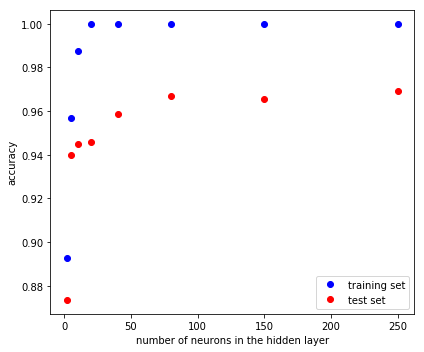

In [48]:
number_of_neurons_list = [2, 5, 10, 20, 40, 80, 150, 250]

accuracies_on_training_set = []
accuracies_on_test_set = []

for i in range(len(number_of_neurons_list)):
    number_of_neurons = number_of_neurons_list[i]
    
    # define the network
    neural_network = MLPClassifier(hidden_layer_sizes=(number_of_neurons,), activation='relu', solver='adam', max_iter=1000)
    neural_network.fit(X_train, y_train)
    
    # append the accuracy on the training set and the test set to the relevant lists
    accuracies_on_training_set.append(neural_network.score(X_train, y_train))
    accuracies_on_test_set.append(neural_network.score(X_test, y_test))
    
# plot them!
plt.figure(1, figsize=(6, 5))
plt.plot(number_of_neurons_list, accuracies_on_training_set, "ob", label="training set")
plt.plot(number_of_neurons_list, accuracies_on_test_set, "or", label="test set")
plt.xlabel("number of neurons in the hidden layer")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.tight_layout()

**Exercise:** Can you observe the effect of overfitting in this previous example? <br>
Try to build a more complex network (with several hidden layers), and increase gardually the number of neurons per layer. Can you observe the effect of overfitting then?

# 4.3. Imbalanced datasets
In this part of the notebook we will create an imblanaced dataset and examine the accuracy of classification for the two different classes. We will then examine the ROC curve for this specific problem.

In [49]:
# simulate a complex dataset as we had in the previous exercise
# note - in order to simulate imbalanced dataset, we need to use the weights parameter in make_classification
X_total, y_total = make_classification(n_samples=5000, n_features=30, n_informative=25, n_redundant=5,
                                      weights=[0.9, 0.1])
print("shape of our simulated dataset: ", X_total.shape, y_total.shape)
print("length of class 0: ", len(y_total[y_total == 0]))
print("length of class 1: ", len(y_total[y_total == 1]))

# divide the sample into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, train_size=0.6, test_size=0.4)
print("shape of our training set: ", X_train.shape, y_train.shape)
print("shape of our test set: ", X_test.shape, y_test.shape)

shape of our simulated dataset:  (5000, 30) (5000,)
length of class 0:  4480
length of class 1:  520
shape of our training set:  (3000, 30) (3000,)
shape of our test set:  (2000, 30) (2000,)


In [50]:
# train a neural network on the training set
neural_network = MLPClassifier(hidden_layer_sizes=(20, 10, 5), activation='relu', solver='adam')
neural_network.fit(X_train, y_train)

# print the total accuracy of the classifier, but also the accuracy as a function of the different classes
print("total accuracy on training set: ", neural_network.score(X_train, y_train))
print("total accuracy on test set: ", neural_network.score(X_test, y_test))

print("accuracy for class 0, training set: ", neural_network.score(X_train[y_train==0, :], y_train[y_train == 0]))
print("accuracy for class 0, test set: ", neural_network.score(X_test[y_test==0, :], y_test[y_test == 0]))

print("accuracy for class 1, training set: ", neural_network.score(X_train[y_train==1, :], y_train[y_train == 1]))
print("accuracy for class 1, test set: ", neural_network.score(X_test[y_test==1, :], y_test[y_test == 1]))

total accuracy on training set:  0.9996666666666667
total accuracy on test set:  0.966
accuracy for class 0, training set:  1.0
accuracy for class 0, test set:  0.9838440111420613
accuracy for class 1, training set:  0.9968253968253968
accuracy for class 1, test set:  0.8097560975609757


### What do we see?
We see that although we got a very nice accuracy on the global test set, the accuracy is very different for the two classes of objects. <br>
We see that the classifier is optimized to find class zero (the large class), and much less optimized to find class one (the smaller class). <br>
In many cases the class that we are interested in is the **smaller** class, and therefore it is important to examine the accuracies for the two classes separaretly. 
<br>

## ROC curve to the rescue!
Suppose that we are interested in finding as many as possible objects from class 1. Suppose that we are willing to pay the price and have a non-negligble amount of false positives, because we plan to go over all the objects by eye. We can use the ROC curve to decide which threshold we should use in order to make this happen. <br>
We will use scikit-learn implementation of the ROC curve: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

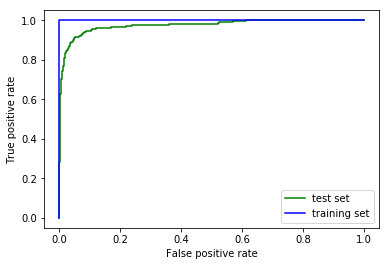

In [52]:
# predict the probability for each of the classes
proba_test_all = neural_network.predict_proba(X_test)
proba_train_all = neural_network.predict_proba(X_train)

# extract only the probabilities of "class one"
proba_test_class_1 = proba_test_all[:, 1]
proba_train_class_1 = proba_train_all[:, 1]

# return the roc_curve of class 1
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, proba_test_class_1, pos_label=1)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, proba_train_class_1, pos_label=1)

# plot the two curves!
plt.plot(fpr_test, tpr_test, "g", label="test set")
plt.plot(fpr_train, tpr_train, "b", label="training set")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc="best")

**Exercise:** make sure that you understand the meaning of this ROC curve, does it make sense?
Given the ROC curve of the test set, if we want to recover 90% of the objects in class 1 (the smaller class), how many false positives will we get?